# Desvendando Tendências: Uma Perspectiva do Cientista de Dados sobre Roubos de Veículos

Introdução:

-    A crescente complexidade das questões de segurança pública tem impulsionado a busca por métodos inovadores e eficazes na prevenção e gestão de crimes. Nesse contexto, a integração de inteligência artificial (IA) nos processos de previsão de ocorrências criminais podem representa um avanço significativo. Este estudo se propõe a explorar uma perspectiva prática da aplicação de IA na análise de dados de ocorrências criminais, visando não apenas compreender padrões históricos, mas também antecipar tendências futuras.

-    Ao utilizar conjuntos de dados abrangentes provenientes de registros da Secretaria de Segurança Publica de São Paulo, pretendo empregar algoritmos de machine learning para identificar padrões complexos e relações ocultas. Essa abordagem não apenas oferece insights valiosos para as forças de segurança, mas também fornece uma base sólida para a implementação de estratégias proativas e direcionadas. Ao longo deste estudo, examinaremos a eficácia da IA na previsão de crimes, destacando sua aplicabilidade prática e o potencial impacto positivo na tomada de decisões em segurança pública.

In [1]:
# Versão da Linguagem Python
from platform import python_version
%reload_ext watermark
%watermark -a "Ricardo de Souza Silva" 

Author: Ricardo de Souza Silva



## Pacote Necessários

In [2]:
import pandas as pd                                                             # Importa a biblioteca pandas para manipulação de dados
from statsmodels.tsa.stattools import adfuller                                  # Importa a função para o teste de Dickey-Fuller aumentado
import matplotlib.pyplot as plt                                                 # Importa a biblioteca para criação de gráficos
from statsmodels.tsa.arima.model import ARIMA                                   # Importa a classe ARIMA para modelagem de séries temporais
from statsmodels.tsa.statespace.sarimax import SARIMAX                          # Importa a classe SARIMAX para modelagem de séries temporais com componentes sazonais
import numpy as np                                                              # Importa a biblioteca numpy para manipulação de arrays numéricos
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score   # Importa as funções de métricas de erro
import seaborn as sns                                                           # Importa a biblioteca seaborn para visualização de dados
import warnings                                                                 # Importa a biblioteca warnings para manipulação de avisos
warnings.filterwarnings('ignore')                                               # Ignora avisos de alerta para manter o output limpo

import statsmodels
import matplotlib
import sklearn

print(f'Pandas version: {pd.__version__}')
print(f'Statsmodels version: {statsmodels.__version__}')
print(f'Matplotlib version: {matplotlib.__version__}')
print(f'NumPy version: {np.__version__}')
print(f'Scikit-learn version: {sklearn.__version__}')
print(f'Seaborn version: {sns.__version__}')

Pandas version: 2.2.2
Statsmodels version: 0.14.2
Matplotlib version: 3.9.2
NumPy version: 1.26.4
Scikit-learn version: 1.5.1
Seaborn version: 0.13.2


## Carregando os Dados e Compreendendo as Variáveis

In [3]:
# Lista para identificar os valores ausentes
lista_labels_valores_ausentes = ["n/a,", "na", "undefined"]

In [4]:
# Lê um arquivo CSV ('dados_2012_2022.csv') e cria um DataFrame chamado 'dataset'
# Permite especificar valores a serem tratados como ausentes durante a leitura
dataset = pd.read_csv('data_set\dados_2012_2022.csv', na_values = lista_labels_valores_ausentes)

In [5]:
# Verificando quantidade de linhas e colunas com a função shape 1689066
dataset.shape

(1702378, 54)

In [6]:
# Define o nome do arquivo CSV a ser lido como 'dicionario_consolidado.csv'
# Separa os valores no arquivo CSV usando o ponto e vírgula (";")
# Define valores na lista 'lista_labels_valores_ausentes' como NaN (valores ausentes)
# Usa a codificação 'latin1' para garantir que caracteres especiais sejam lidos corretamente
dicionario = pd.read_csv('dicionario_consolidado.csv', sep=';', na_values=lista_labels_valores_ausentes, encoding='latin1')

In [7]:
# Imprime uma mensagem comparando as formas (número de linhas e colunas) do DataFrame 'dataset' e 'dicionario'
print(f"Comparando o dataset com o dicionario de dados\n"
      f"dataset = {dataset.shape}\n"
      f"dicionario = {dicionario.shape}")

Comparando o dataset com o dicionario de dados
dataset = (1702378, 54)
dicionario = (54, 2)


In [8]:
# Concatena os dataframes 
df_compara_colunas = pd.concat([pd.Series(dataset.columns.tolist()), dicionario['Variavel']], axis = 1)

In [9]:
# Renomeia as colunas
df_compara_colunas.rename(columns = {0: 'Coluna no Dataset', 'Variavel': 'Coluna no Dicionario'}, inplace = True)

Comparando dicionário com o dataset:

Ao comparar o dicionário com o conjunto de dados (dataset), não identifiquei possíveis discrepâncias entre as informações presentes em ambas as fontes. Esse processo é fundamental para garantir a consistência e a precisão dos dados, bem como para verificar se todas as entradas no dicionário estão devidamente representadas no conjunto de dados e vice-versa. Dessa forma, podemos assegurar a integridade e confiabilidade das informações analisadas.

In [10]:
# Visualiza
df_compara_colunas.head(60)

,Coluna no Dataset,Coluna no Dicionario
0,ANO_BO,ANO_BO
1,NUM_BO,NUM_BO
2,NUMERO_BOLETIM,NUMERO_BOLETIM
3,BO_INICIADO,BO_INICIADO
4,BO_EMITIDO,BO_EMITIDO
5,DATAOCORRENCIA,DATAOCORRENCIA
6,HORAOCORRENCIA,HORAOCORRENCIA
7,PERIDOOCORRENCIA,PERIDOOCORRENCIA
8,DATACOMUNICACAO,DATACOMUNICACAO
9,DATAELABORACAO,DATAELABORACAO


# Limpeza e Pré-processamento dos Dados

Verificando a porcentagem de dados ausentes, percentualmente.

In [11]:
# Calcula a porcentagem de valores ausentes em cada coluna do DataFrame 'dataset'
percentagem_valores_ausentes = dataset.isna().sum() / len(dataset) * 100
# Arredonda as porcentagens para números inteiros
percentagem_valores_ausentes_arredondada = percentagem_valores_ausentes.round()
# Imprime as porcentagens arredondadas
print(percentagem_valores_ausentes_arredondada)

ANO_BO                        0.0
NUM_BO                        0.0
NUMERO_BOLETIM                0.0
BO_INICIADO                   0.0
BO_EMITIDO                    0.0
DATAOCORRENCIA                0.0
HORAOCORRENCIA                6.0
PERIDOOCORRENCIA              0.0
DATACOMUNICACAO               0.0
DATAELABORACAO                0.0
BO_AUTORIA                    0.0
FLAGRANTE                     0.0
NUMERO_BOLETIM_PRINCIPAL     89.0
LOGRADOURO                    9.0
NUMERO                        0.0
BAIRRO                        6.0
CIDADE                        0.0
UF                            0.0
LATITUDE                     12.0
LONGITUDE                    12.0
DESCRICAOLOCAL                0.0
EXAME                        75.0
SOLUCAO                       0.0
DELEGACIA_NOME                0.0
DELEGACIA_CIRCUNSCRICAO       0.0
ESPECIE                       0.0
RUBRICA                       0.0
DESDOBRAMENTO                94.0
STATUS                        4.0
TIPOPESSOA    

Prosseguirei com a exclusão das variáveis que apresentam 70% ou mais de valores ausentes. Essa decisão foi tomada após identificarmos que as variáveis que necessitam de exclusão coincidem com aquelas que possuem uma taxa de ausência superior a 70%.

A exclusão das variáveis com valores ausentes no conjunto de dados foi decidida com base em diversas considerações. A presença de valores ausentes em todas as observações sugere que essas variáveis podem não contribuir significativamente para a análise ou modelagem, tornando-as potencialmente irrelevantes. Além disso, a ausência total de dados pode dificultar ou impossibilitar a imputação de valores, levando à escolha de exclusão como uma alternativa.

Essa decisão visa aprimorar a qualidade do conjunto de dados, eliminando variáveis sem informações úteis e simplificando o processo de análise. Vale ressaltar que a exclusão foi realizada com o intuito de melhorar a eficiência computacional, atender aos requisitos do modelo e evitar possíveis distorções nos resultados.

Acho importante documentar transparentemente essas decisões, garantindo uma abordagem metodológica rigorosa no processo de análise de dados. A exclusão dessas variáveis busca otimizar o conjunto de dados para análises mais relevantes e eficazes.

In [12]:
# Obtém o nome das colunas
colunas = dataset.columns

# Verifica se há valores com mais de 70% de ausentes em cada coluna e exclui
# Itera sobre cada coluna na lista de colunas
for coluna in colunas:
    # Calcula o percentual de valores ausentes na coluna atual
    percentual_ausentes = (dataset[coluna].isna().sum() / len(dataset)) * 100
    # Verifica se o percentual de valores ausentes é maior ou igual a 70%
    if percentual_ausentes >= 70:
        # Imprime o nome da coluna e o número de valores ausentes nela
        print(f"{coluna} = {dataset[coluna].isna().sum()}")
        # Remove a coluna do DataFrame se o percentual de ausência for alto
        dataset.drop([coluna], axis=1, inplace=True)

NUMERO_BOLETIM_PRINCIPAL = 1517782
EXAME = 1271651
DESDOBRAMENTO = 1594405
TIPOPESSOA = 1693625
VITIMAFATAL = 1693625
NATURALIDADE = 1696873
NACIONALIDADE = 1697599
SEXO = 1693749
DATANASCIMENTO = 1696042
IDADE = 1695862
ESTADOCIVIL = 1697040
PROFISSAO = 1698855
GRAUINSTRUCAO = 1698904
CORCUTIS = 1694659
NATUREZAVINCULADA = 1693625
TIPOVINCULO = 1693625
RELACIONAMENTO = 1702342
PARENTESCO = 1702378
QUANT_CELULAR = 1702378
MARCA_CELULAR = 1702378


In [13]:
# Verificando quantidade de linhas e colunas com a função shape
dataset.shape

(1702378, 34)

In [14]:
# Calcula a porcentagem de valores ausentes em cada coluna do DataFrame 'dataset'
percentagem_valores_ausentes = dataset.isna().sum() / len(dataset) * 100
# Arredonda as porcentagens para números inteiros
percentagem_valores_ausentes_arredondada = percentagem_valores_ausentes.round()
# Imprime as porcentagens arredondadas
print(percentagem_valores_ausentes_arredondada)

ANO_BO                      0.0
NUM_BO                      0.0
NUMERO_BOLETIM              0.0
BO_INICIADO                 0.0
BO_EMITIDO                  0.0
DATAOCORRENCIA              0.0
HORAOCORRENCIA              6.0
PERIDOOCORRENCIA            0.0
DATACOMUNICACAO             0.0
DATAELABORACAO              0.0
BO_AUTORIA                  0.0
FLAGRANTE                   0.0
LOGRADOURO                  9.0
NUMERO                      0.0
BAIRRO                      6.0
CIDADE                      0.0
UF                          0.0
LATITUDE                   12.0
LONGITUDE                  12.0
DESCRICAOLOCAL              0.0
SOLUCAO                     0.0
DELEGACIA_NOME              0.0
DELEGACIA_CIRCUNSCRICAO     0.0
ESPECIE                     0.0
RUBRICA                     0.0
STATUS                      4.0
PLACA_VEICULO              29.0
UF_VEICULO                 28.0
CIDADE_VEICULO             29.0
DESCR_COR_VEICULO          28.0
DESCR_MARCA_VEICULO        29.0
ANO_FABR

Seguiremos com a exclusão de dados duplicados com base na metodologia da Secretaria de Segurança Pública de São Paulo pode ser justificada pelos seguintes motivos:

* Garantia da Qualidade dos Dados: 

A exclusão de duplicatas ajuda a garantir a qualidade dos dados, pois elimina registros repetidos que podem distorcer análises estatísticas e conclusões derivadas dos dados.

* Evita Viés nos Resultados: 

A presença de duplicatas pode distorcer as conclusões tiradas a partir dos dados, levando a resultados enviesados ou imprecisos. A remoção das duplicatas garante que as análises sejam baseadas em informações únicas e não duplicadas.

* Consistência nas Estatísticas: 

Ao remover duplicatas, as estatísticas e métricas derivadas dos dados serão mais consistentes e representativas da realidade, permitindo uma interpretação mais confiável dos resultados.

* Simplicidade na Análise: 

A exclusão de duplicatas simplifica o processo de análise, uma vez que reduz o número de registros a serem considerados, facilitando a interpretação e compreensão dos dados.

* Conformidade com Padrões de Relatórios: 

A remoção de duplicatas pode ser um requisito padrão ou recomendado em relatórios oficiais ou análises estatísticas, garantindo a conformidade com os padrões estabelecidos pela Secretaria de Segurança Pública de São Paulo ou outras autoridades relevantes.

Em resumo, a exclusão de dados duplicados baseia-se na necessidade de garantir a qualidade, precisão e confiabilidade dos dados, bem como na conformidade com os padrões e metodologias estabelecidos pelas autoridades competentes, como a Secretaria de Segurança Pública de São Paulo.

In [15]:
# Verificando e contando as linhas duplicadas no DataFrame 'novo_dataset'
dataset.duplicated(subset=["DELEGACIA_NOME", "ANO_BO", "NUM_BO"]).sum() / len(dataset) * 100

51.25119098108646

Analisei o conjunto de dados e identifiquei que 51,25% das entradas são duplicadas. Diante desse cenário, torna-se evidente a necessidade de proceder com a exclusão desses dados duplicados. Este passo é crucial para garantir a integridade e confiabilidade das análises, evitando distorções nos resultados e proporcionando uma visão mais precisa do conjunto de dados.

In [16]:
# Remover duplicatas com base nos campos DELEGACIA_NOME, ANO_BO e NUM_BO
dataset = dataset.drop_duplicates(subset=["DELEGACIA_NOME", "ANO_BO", "NUM_BO"])

In [17]:
dataset.shape

(829889, 34)

In [18]:
# Verificando e contando as linhas duplicadas no DataFrame 'novo_dataset'
dataset.duplicated().sum() / len(dataset) * 100

0.0

A exclusão de determinadas colunas do conjunto de dados foi uma decisão baseada em critérios específicos visando otimizar a qualidade e relevância da análise. Colunas consideradas não relevantes foram removidas, uma vez que não contribuíam diretamente para os objetivos da análise ou modelagem em curso. Essas variáveis não forneciam informações significativas para a compreensão do problema em questão e, em alguns casos, apresentavam ausência total de variação.

A escolha pela exclusão dessas colunas foi também motivada pela presença de valores ausentes em quantidade significativa, tornando a imputação desses valores desafiadora e, em alguns casos, inviável. A decisão de simplificar o conjunto de dados busca não apenas melhorar a eficiência computacional da análise, mas também assegurar que a interpretação dos resultados seja mais clara e focada nas variáveis verdadeiramente relevantes para os objetivos do projeto.

Essa prática segue padrões comuns de pré-processamento de dados, visando garantir a qualidade e a consistência dos resultados finais. A documentação transparente dessas decisões é parte integrante do processo analítico, proporcionando transparência, replicabilidade e confiança nos resultados obtidos.

In [19]:
colunas_para_remover = ['NUM_BO','BO_INICIADO','BO_EMITIDO','BO_AUTORIA', 'FLAGRANTE', 'NUMERO_BOLETIM', 'DESCRICAOLOCAL', 
                        'DELEGACIA_NOME', 'DELEGACIA_CIRCUNSCRICAO', 'ESPECIE', 
                        'RUBRICA', 'STATUS', 'ANO_FABRICACAO', 'ANO_MODELO','SOLUCAO',
                        'DATACOMUNICACAO','DESCR_MARCA_VEICULO','DESCR_COR_VEICULO',
                        'CIDADE_VEICULO','UF_VEICULO','PLACA_VEICULO','DESCR_TIPO_VEICULO','UF','LATITUDE','LONGITUDE','LOGRADOURO','NUMERO','HORAOCORRENCIA', 'DATAELABORACAO'] #'BAIRRO'

# Removendo as colunas especificadas do novo_dataset
dataset.drop(colunas_para_remover, axis=1, inplace=True)

In [20]:
# Calcula a porcentagem de valores ausentes em cada coluna do DataFrame 'dataset'
percentagem_valores_ausentes = dataset.isna().sum() / len(dataset) * 100
# Arredonda as porcentagens para números inteiros
percentagem_valores_ausentes_arredondada = percentagem_valores_ausentes.round()
# Imprime as porcentagens arredondadas
print(percentagem_valores_ausentes_arredondada)

ANO_BO              0.0
DATAOCORRENCIA      0.0
PERIDOOCORRENCIA    0.0
BAIRRO              7.0
CIDADE              0.0
dtype: float64


In [21]:
dataset.shape

(829889, 5)

In [22]:
# Calcula a contagem de ocorrências para cada valor único na coluna 'CIDADE'
dataset['CIDADE'].value_counts().head(20)

CIDADE
S.PAULO                  390926
CAMPINAS                  41406
S.BERNARDO DO CAMPO       32983
S.ANDRE                   31923
GUARULHOS                 31446
DIADEMA                   28012
OSASCO                    18948
MAUA                      17209
ITAQUAQUECETUBA           11766
RIBEIRAO PRETO             9952
SUZANO                     9145
S.JOSE DOS CAMPOS          8854
SUMARE                     7298
JUNDIAI                    7238
PRAIA GRANDE               7172
SOROCABA                   7068
CARAPICUIBA                6828
TABOAO DA SERRA            6721
FERRAZ DE VASCONCELOS      6572
HORTOLANDIA                6009
Name: count, dtype: int64

In [23]:
# Filtra o DataFrame para incluir apenas as linhas onde o valor da coluna 'CIDADE' é igual a 'S.PAULO'
dataset = dataset[dataset['CIDADE'] == 'S.PAULO']

In [24]:
# Calcula a porcentagem de valores ausentes em cada coluna do DataFrame 'dataset'
percentagem_valores_ausentes = dataset.isna().sum() / len(dataset) * 100
# Arredonda as porcentagens para números inteiros
percentagem_valores_ausentes_arredondada = percentagem_valores_ausentes.round()
# Imprime as porcentagens arredondadas
print(percentagem_valores_ausentes_arredondada)

ANO_BO              0.0
DATAOCORRENCIA      0.0
PERIDOOCORRENCIA    0.0
BAIRRO              9.0
CIDADE              0.0
dtype: float64


Agora que as variáveis de trabalho foram definidas, podemos proceder com o tratamento individual de cada uma delas, visando alcançar os resultados mais eficazes. Este processo envolverá a aplicação de técnicas específicas para cada variável, otimizando sua qualidade e preparando-as adequadamente para as análises subsequentes. A abordagem individualizada visa assegurar que cada variável seja tratada de maneira apropriada, contribuindo para a robustez e confiabilidade dos resultados finais.

# Pré-processamento Variável a Variável

Primeiro tratarei da variavel ANO_BO. 

Verificando a existencia de outliers.

In [25]:
dataset.head()

,ANO_BO,DATAOCORRENCIA,PERIDOOCORRENCIA,BAIRRO,CIDADE
6,2011,2011-12-31 00:00:00,A NOITE,PQ SAO RAFAEL,S.PAULO
7,2012,2011-12-31 00:00:00,A NOITE,JD SÃO JOÃO,S.PAULO
9,2011,2011-12-31 00:00:00,A NOITE,PQ. IPÊ,S.PAULO
11,2012,2011-12-31 00:00:00,A NOITE,NaN,S.PAULO
12,2012,2011-12-31 00:00:00,A NOITE,JD. ITAMARATI,S.PAULO


In [26]:
dataset['ANO_BO'].value_counts().sort_index()

ANO_BO
2011        2
2012    49301
2013    55949
2014    55288
2015    44269
2016    43183
2017    36401
2018    30559
2019    24221
2020    15922
2021    15024
2022    20693
2023      114
Name: count, dtype: int64

Uma análise inicial dos dados revela uma distribuição das ocorrências ao longo dos anos. Observa-se uma quantidade considerável de ocorrências registradas nos anos de 2012 e 2013, com 49.301 e 55.949 ocorrências, respectivamente. Estes números diminuem gradualmente nos anos subsequentes, com uma queda acentuada em 2019 e 2020, onde o número de ocorrências é de 24.221 e 15.922, respectivamente.

Entretanto, ao examinar os dados mais detalhadamente, notei valores surpreendentemente baixos de ocorrências registradas em 2011, totalizando apenas 2 ocorrências, e em 2023, totalizando apenas 114 ocorrências. Estes valores destoam significativamente dos padrões observados nos anos anteriores. Considerando que estou focando na análise dos anos de 2012 a 2022, excluirei os dados de 2011 e 2023 da nossa análise, uma vez que não são relevantes para o período de estudo.

- 2011: 2 ocorrências
- 2023: 114 ocorrências

Essa exclusão permite uma análise mais precisa e relevante para o período em estudo, garantindo que minha análise seja mais focada nos padrões e tendências observados nos anos analisados, de 2012 a 2022.

In [27]:
# Filtro para excluir as linhas em que o valor da coluna 'ANO_BO' seja igual a 2011
dataset = dataset.loc[dataset['ANO_BO'] != 2011]

# Filtro para excluir as linhas em que o valor da coluna 'ANO_BO' seja igual a 2023
dataset = dataset.loc[dataset['ANO_BO'] != 2023]

Para garantir consistência, efetuei a conversão desses dados para o tipo 'int64', assegurando que todos os valores na coluna 'ANO_BO' sejam do mesmo tipo numérico.

In [28]:
# Convertendo a coluna 'ANO_BO' para tipo numérico (int)
dataset['ANO_BO'] = pd.to_numeric(dataset['ANO_BO'], errors='coerce')

# Contando a ocorrência de valores únicos na coluna 'ANO_BO' e ordenando
dataset['ANO_BO'].value_counts().sort_index()

ANO_BO
2012    49301
2013    55949
2014    55288
2015    44269
2016    43183
2017    36401
2018    30559
2019    24221
2020    15922
2021    15024
2022    20693
Name: count, dtype: int64

O código em questão realiza operações de pré-processamento em uma coluna chamada 'DATAOCORRENCIA' em um conjunto de dados denominado novo_dataset. 

Primeiramente, são excluídas as linhas em que o valor da coluna é '00:00:00', indicando possivelmente registros onde a hora específica não é relevante para a análise. 

Em seguida, a coluna 'DATAOCORRENCIA' é convertida para o formato de data e hora desejado ('%Y-%m-%d %H:%M:%S') usando a biblioteca Pandas.

In [29]:
# Excluindo as linhas onde 'DATAOCORRENCIA' é '00:00:00'
dataset = dataset[dataset['DATAOCORRENCIA'] != '00:00:00']

# Convertendo 'DATAOCORRENCIA' para formato de data e hora desejado (por exemplo, '2003-01-01 00:00:00')
dataset['DATAOCORRENCIA'] = pd.to_datetime(dataset['DATAOCORRENCIA'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Se necessário, resetar o índice
dataset.reset_index(drop=True, inplace=True)

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390810 entries, 0 to 390809
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ANO_BO            390810 non-null  int64         
 1   DATAOCORRENCIA    390807 non-null  datetime64[ns]
 2   PERIDOOCORRENCIA  390810 non-null  object        
 3   BAIRRO            356852 non-null  object        
 4   CIDADE            390810 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 14.9+ MB


In [31]:
dataset.head()

,ANO_BO,DATAOCORRENCIA,PERIDOOCORRENCIA,BAIRRO,CIDADE
0,2012,2011-12-31,A NOITE,JD SÃO JOÃO,S.PAULO
1,2012,2011-12-31,A NOITE,NaN,S.PAULO
2,2012,2011-12-31,A NOITE,JD. ITAMARATI,S.PAULO
3,2012,2011-12-31,A NOITE,JARDIM IGUATEMI,S.PAULO
4,2012,2012-01-01,DE MADRUGADA,AMERICANOPOLIS,S.PAULO


Convertendo a coluna 'HORAOCORRENCIA' para o tipo datetime.time

- Motivação: 
        
    A conversão é realizada para facilitar a manipulação e análise dos horários das ocorrências. 
    Ao converter os valores para o tipo de dados datetime.time, posso realizar operações relacionadas a datas e horários e garantir que os valores estejam corretamente interpretados.
    O parâmetro 'format' é utilizado para especificar o formato das horas, minutos e segundos presentes na string original, garantindo que o Pandas interprete corretamente os valores de hora na string.
    O parâmetro 'errors' é configurado como 'coerce' para lidar com valores inválidos ou impossíveis de serem convertidos, definindo-os como 'NaT' (Not a Time) caso ocorram.
    Por fim, o componente de tempo do objeto datetime é atribuído de volta à coluna 'HORAOCORRENCIA', convertendo-a para o tipo datetime.time.


In [32]:
# Criando novas colunas 'DATA_ELABORACAO' e 'HORA_ELABORACAO'
# novo_dataset[['DATA_ELABORACAO', 'HORA_ELABORACAO']] = novo_dataset['DATAELABORACAO'].str.split(' ', n=1, expand=True)

# Convertendo a coluna 'HORAOCORRENCIA' para o formato de data
#novo_dataset['HORAOCORRENCIA'] = pd.to_datetime(novo_dataset['HORAOCORRENCIA'], format='%H:%M:%S').dt.time

In [33]:
# Removendo as datas anteriores a 2012
dataset = dataset[dataset['DATAOCORRENCIA'].dt.year >= 2012]

Alterando nome coluna PERIDOOCORRENCIA para PERIODOOCORRENCIA.

- Motivação: 

    Essa alteração é importante para manter a consistência nos dados e evitar confusões ao referenciar a coluna em análises posteriores. 
    
    Certificar-se de que o nome da coluna está correto e claro é uma boa prática para garantir a qualidade e a interpretabilidade dos conjuntos de dados.

In [34]:
# A linha abaixo cria uma nova coluna chamada 'PERIODOOCORRENCIA' e atribui a ela os valores da coluna 'PERIDOOCORRENCIA' do dataset
dataset['PERIODOOCORRENCIA'] = dataset['PERIDOOCORRENCIA']

# A linha abaixo remove a coluna 'PERIDOOCORRENCIA' do dataset, conforme solicitado anteriormente
dataset.drop(["PERIDOOCORRENCIA"], axis=1, inplace=True)

In [35]:
# Criar uma agregação personalizada contando ocorrências de cada valor na coluna 'PERIDOOCORRENCIA' e ordenando pelo índice
agregado_personalizado = dataset['PERIODOOCORRENCIA'].value_counts().sort_index()
agregado_personalizado

PERIODOOCORRENCIA
A NOITE            184768
A TARDE             74446
DE MADRUGADA        52139
EM HORA INCERTA       346
PELA MANHÃ          78278
Name: count, dtype: int64

In [36]:
# Filtro para excluir as linhas em que o valor da coluna 'PERIODOOCORRENCIA' seja igual a 'EM HORA INCERTA'
# novo_dataset = novo_dataset.loc[novo_dataset['PERIODOOCORRENCIA'] != 'EM HORA INCERTA']

In [37]:
dataset.head()

,ANO_BO,DATAOCORRENCIA,BAIRRO,CIDADE,PERIODOOCORRENCIA
4,2012,2012-01-01,AMERICANOPOLIS,S.PAULO,DE MADRUGADA
5,2012,2012-01-01,PQ SAO RAFAEL,S.PAULO,DE MADRUGADA
8,2012,2012-01-01,JARDIM RODOLFO PIRANI,S.PAULO,DE MADRUGADA
9,2012,2012-01-01,JD. SAPOPEMBA,S.PAULO,DE MADRUGADA
10,2012,2012-01-01,EDU CHAVES,S.PAULO,DE MADRUGADA


In [38]:
# Lista que especifica a ordem desejada das colunas
dados_organizados = ['ANO_BO','DATAOCORRENCIA','BAIRRO',
                     'PERIODOOCORRENCIA','CIDADE'] # ,'LATITUDE','LONGITUDE','LOGRADOURO','NUMERO','BAIRRO'

# Reorganizando as colunas do conjunto de dados de acordo com a ordem especificada na lista 'dados_organizados'
dataset = dataset.reindex(columns=dados_organizados)

In [39]:
dataset.head()

,ANO_BO,DATAOCORRENCIA,BAIRRO,PERIODOOCORRENCIA,CIDADE
4,2012,2012-01-01,AMERICANOPOLIS,DE MADRUGADA,S.PAULO
5,2012,2012-01-01,PQ SAO RAFAEL,DE MADRUGADA,S.PAULO
8,2012,2012-01-01,JARDIM RODOLFO PIRANI,DE MADRUGADA,S.PAULO
9,2012,2012-01-01,JD. SAPOPEMBA,DE MADRUGADA,S.PAULO
10,2012,2012-01-01,EDU CHAVES,DE MADRUGADA,S.PAULO


In [40]:
dataset.shape

(389977, 5)

In [41]:
# Calcula a porcentagem de valores ausentes em cada coluna do DataFrame 'dataset'
percentagem_valores_ausentes = dataset.isna().sum() / len(dataset) * 100
# Arredonda as porcentagens para números inteiros
percentagem_valores_ausentes_arredondada = percentagem_valores_ausentes.round()
# Imprime as porcentagens arredondadas
print(percentagem_valores_ausentes_arredondada)

ANO_BO               0.0
DATAOCORRENCIA       0.0
BAIRRO               9.0
PERIODOOCORRENCIA    0.0
CIDADE               0.0
dtype: float64


Tratando os dados nulos restantes.

1. **HORAOCORRENCIA**:

   - Justificativa: A hora da ocorrência é uma informação essencial para análises temporais e pode influenciar na compreensão dos padrões de ocorrências. Como não há uma maneira confiável de estimar ou preencher os valores nulos, a exclusão desses registros é justificada para preservar a integridade dos dados e garantir a precisão das análises temporais.

2. **BAIRRO**:

   - Justificativa: Assim como o logradouro, o bairro é uma informação crucial para análises geográficas e pode influenciar na compreensão dos padrões de crimes em áreas específicas. Como não há meios confiáveis de imputar esses dados, a exclusão dos registros nulos é necessária para garantir que as análises geográficas sejam baseadas em dados completos e confiáveis.

Em resumo, a exclusão dos valores nulos em cada variável é justificada pela importância das informações ausentes para as análises subsequentes e pela falta de métodos confiáveis para estimar ou preencher esses dados. Essa abordagem visa preservar a integridade e a qualidade dos dados, garantindo resultados precisos e confiáveis em análises posteriores.

In [42]:
# Remove as linhas que contêm valores nulos em qualquer uma das colunas
#novo_dataset.dropna(inplace=True)

In [43]:
dataset.shape

(389977, 5)

In [44]:
# Calcula a contagem de ocorrências para cada valor único na coluna 'CIDADE'
# dataset['CIDADE'].value_counts().head(20)

A cidade de São Paulo foi escolhida como foco devido ao seu status como a maior cidade do estado e por abrigar o maior número de habitantes conforme registrado no ultimo Censo 2010, além de registrar o maior número de ocorrências de roubo de veículos nesse período totalizando 47,10% do total de roubos do estado.

Esta decisão foi tomada com base em vários fatores:

- Tamanho e Importância:
    
    São Paulo é a maior cidade do estado, tanto em termos de área geográfica quanto de população. De acordo com o Censo de 2010, a cidade de São Paulo tinha uma população total de aproximadamente 11 milhões de habitantes, distribuídos em seus diversos distritos e subprefeituras. Com suas múltiplas subprefeituras e distritos, cada uma com sua própria área, população e densidade demográfica, a cidade apresenta uma variedade de desafios e oportunidades únicas no contexto da segurança pública e combate à criminalidade.

- Alto Número de Ocorrências: 
    
    A análise da contagem de ocorrências por cidade revelou que São Paulo tem um número de roubos nove vezes maior em comparação com Campinas, que ocupa o segundo lugar no ranking de roubos por cidades do estado. Isso indica que São Paulo pode ser uma área de alto risco em termos de criminalidade, exigindo atenção especial das autoridades. Além disso, uma análise mais detalhada dos dados revela que bairros como Ipiranga, Iguatemi, Guaianases, São Mateus e Jabaquara estão entre os mais afetados por roubos, com números significativos de ocorrências. Isso destaca a necessidade de intervenção prioritária nessas áreas para combater a criminalidade e melhorar a segurança pública.

- Necessidade de Intervenção Prioritária: 
    
    Dada a alta incidência de ocorrências em São Paulo, é crucial priorizar esta cidade para intervenções adicionais destinadas a combater a criminalidade e melhorar a segurança pública. A concentração de recursos e esforços em São Paulo pode ter um impacto significativo na redução da criminalidade em todo o estado. Estratégias específicas de policiamento comunitário podem ser implementadas em áreas com alta densidade populacional, como Mooca e Santana, visando fortalecer o relacionamento entre a polícia e a comunidade e promover uma maior sensação de segurança.

# Análise descritiva

## Medidas de Tendência

- Censo 2022 foi divulgado nesta quarta-feira (28) pelo IBGE. São Paulo é a cidade mais populosa do Brasil, com 11.451.245 habitantes. 
- O dado faz parte do Censo 2022, do Instituto Brasileiro de Geografia e Estatística (IBGE), divulgado nesta quarta-feira (27/03/2024)

In [45]:
# Contando o número de ocorrências de cada valor único em ANO_BO
contagem_por_ano = dataset['ANO_BO'].value_counts().sort_index()
# print('contagem_por_ano\n', contagem_por_ano)
# Definindo o número aproximado de dias em 11 anos (considerando anos bissextos)
dias_em_11_anos = 11 * 365 + 3  # 3 anos bissextos em 11 anos
# Inicializando a variável para a soma das ocorrências
soma_ocorrencias = 0
# Calculando a soma das ocorrências em contagem_por_ano
for line in range(len(contagem_por_ano)):
    soma_ocorrencias += contagem_por_ano.iloc[line]
# Calculando a média diária de roubos
roubos_diarios = soma_ocorrencias / dias_em_11_anos
# Calculando a média horária de roubos
roubos_por_hora = roubos_diarios / 24
# Exibindo os resultados
roubos_diarios, roubos_por_hora

(97.05749128919861, 4.044062137049942)

In [46]:
# Lista vazia para armazenar a média de roubos por ano
media_roubos_ano = []

# Lista de anos
anos = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
print('Média de Roubos por Dia Ano a Ano')

# Loop sobre os índices da lista contagem_por_ano
for linha in range(len(contagem_por_ano)):
    # Verifica se o ano é bissexto
    ano_atual = anos[linha]
    if (ano_atual % 4 == 0 and ano_atual % 100 != 0) or (ano_atual % 400 == 0):
        dias_no_ano = 366
    else:
        dias_no_ano = 365
    # Calcula a média de roubos por hora para o ano atual e adiciona à lista media_roubos_ano
    media_roubos_ano.append((contagem_por_ano.iloc[linha] / dias_no_ano))
    # Imprime o ano e a média de roubos por hora arredondada para 2 casas decimais
    print(f'{anos[linha]} - {round(media_roubos_ano[linha], 2)}')

Média de Roubos por Dia Ano a Ano
2012 - 133.45
2013 - 153.08
2014 - 151.26
2015 - 121.12
2016 - 117.89
2017 - 99.64
2018 - 83.69
2019 - 66.32
2020 - 43.43
2021 - 41.09
2022 - 56.65


In [47]:
# Lista vazia para armazenar a média de roubos por ano
media_roubos_ano = []
# Lista de anos
anos = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
print('Média de Roubos por Hora Ano a Ano')

# Loop sobre os índices da lista contagem_por_ano
for linha in range(len(contagem_por_ano)):
    # Verifica se o ano é bissexto
    ano_atual = anos[linha]
    if (ano_atual % 4 == 0 and ano_atual % 100 != 0) or (ano_atual % 400 == 0):
        dias_no_ano = 366
    else:
        dias_no_ano = 365
    # Calcula a média de roubos por hora para o ano atual e adiciona à lista media_roubos_ano
    media_roubos_ano.append((contagem_por_ano.iloc[linha] / dias_no_ano) / 24)
    # Imprime o ano e a média de roubos por hora arredondada para 2 casas decimais
    print(f'{anos[linha]} - {round(media_roubos_ano[linha], 2)}')


Média de Roubos por Hora Ano a Ano
2012 - 5.56
2013 - 6.38
2014 - 6.3
2015 - 5.05
2016 - 4.91
2017 - 4.15
2018 - 3.49
2019 - 2.76
2020 - 1.81
2021 - 1.71
2022 - 2.36


In [48]:
# População total
populacao = 11253503 #11451245
# Valor de referência para 100.000 habitantes
por_cem_mil = 100000
# Calcula a população por 100.000 habitantes
pop_por_cem_mil = populacao / por_cem_mil
# Exibe a população por 100.000 habitantes
pop_por_cem_mil
# Contador de anos (começando em 2012)
count = 12
# Loop sobre os índices da lista contagem_por_ano
for cont_ano in range(len(contagem_por_ano)):
    # Exibe o número total de casos no ano atual
    print(f'20{count}--{contagem_por_ano.iloc[cont_ano]}.')
    # Calcula o número de roubos por 100.000 habitantes no ano atual
    roubos_por_cem_mil = round(contagem_por_ano.iloc[cont_ano] / pop_por_cem_mil)
    # Exibe o número de roubos por 100.000 habitantes
    print(f'Roubos por 100.000 habitantes -- {roubos_por_cem_mil}.')
    # Calcula a média diária de roubos por 100.000 habitantes no ano atual
    media_diaria_roubos_por_cem_mil = round(contagem_por_ano.iloc[cont_ano] / pop_por_cem_mil) / 365
    # Exibe a média diária de roubos por 100.000 habitantes
    print(f'Média diária de roubos por 100.000 habitantes -- {media_diaria_roubos_por_cem_mil}\n')
    # Incrementa o contador de anos
    count += 1

2012--48842.
Roubos por 100.000 habitantes -- 434.
Média diária de roubos por 100.000 habitantes -- 1.189041095890411

2013--55873.
Roubos por 100.000 habitantes -- 496.
Média diária de roubos por 100.000 habitantes -- 1.358904109589041

2014--55210.
Roubos por 100.000 habitantes -- 491.
Média diária de roubos por 100.000 habitantes -- 1.3452054794520547

2015--44208.
Roubos por 100.000 habitantes -- 393.
Média diária de roubos por 100.000 habitantes -- 1.0767123287671232

2016--43149.
Roubos por 100.000 habitantes -- 383.
Média diária de roubos por 100.000 habitantes -- 1.0493150684931507

2017--36369.
Roubos por 100.000 habitantes -- 323.
Média diária de roubos por 100.000 habitantes -- 0.8849315068493151

2018--30547.
Roubos por 100.000 habitantes -- 271.
Média diária de roubos por 100.000 habitantes -- 0.7424657534246575

2019--24207.
Roubos por 100.000 habitantes -- 215.
Média diária de roubos por 100.000 habitantes -- 0.589041095890411

2020--15897.
Roubos por 100.000 habitantes 

In [49]:
# Criando uma nova variável 'ANO' que armazena o ano de cada data na coluna 'DATAOCORRENCIA'
ano = dataset['DATAOCORRENCIA'].dt.year
# Criando uma nova variável 'MES' que armazena o mês de cada data na coluna 'DATAOCORRENCIA'
mes = dataset['DATAOCORRENCIA'].dt.month
# Criando uma nova variável 'DIA' que armazena o dia do mês de cada data na coluna 'DATAOCORRENCIA'
dia = dataset['DATAOCORRENCIA'].dt.day
# Criando uma nova variável 'DIA_SEMANA' que armazena o dia da semana de cada data na coluna 'DATAOCORRENCIA'
dia_semana = dataset['DATAOCORRENCIA'].dt.weekday
# Criar uma agregação personalizada contando ocorrências de cada valor na coluna 'PERIDOOCORRENCIA' e ordenando pelo índice
periodo = dataset['PERIODOOCORRENCIA'].value_counts().sort_index()

In [50]:
# Criando um DataFrame com as variáveis 'ano' e 'mes'
tabela_freq = pd.DataFrame({'Ano': ano, 'Mês': mes})
# Definindo os nomes dos meses para os rótulos
meses_rotulos = ['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET', 'OUT', 'NOV', 'DEZ']
# Criando uma tabela pivô para contar ocorrências de cada mês por ano e aplicando rótulos de meses
tabela_frequencia = pd.pivot_table(tabela_freq, index='Ano', columns='Mês', aggfunc='size', fill_value=0)
# Mostrando a tabela de frequência
tabela_frequencia

Mês,1,2,3,4,5,6,7,8,9,10,11,12
Ano,,,,,,,,,,,,
2012,3961,4127,4869,4617,4706,3802,3766,4077,3676,3849,3614,4389
2013,4106,4024,4883,4553,4370,4512,4641,4836,4436,4794,4979,5638
2014,5033,5122,5203,4989,4617,4403,4048,4230,3906,4383,4534,4710
2015,4068,3836,3715,3675,3525,3126,3357,3162,3384,3987,3889,4503
2016,3542,3319,3557,3613,3441,3286,3481,3619,3560,4107,3587,3936
2017,3140,3123,3384,3054,2959,2896,2915,2906,2865,2967,3051,3010
2018,2327,2460,2504,2551,2655,2458,2319,2368,2374,2734,2738,3064
2019,1914,1775,2066,2149,2093,2088,1921,1825,1750,1986,2123,2414
2020,1837,1735,1673,1179,943,970,1104,1044,1057,1216,1398,1728


## Distribuição Anual de Roubos de Veículos:

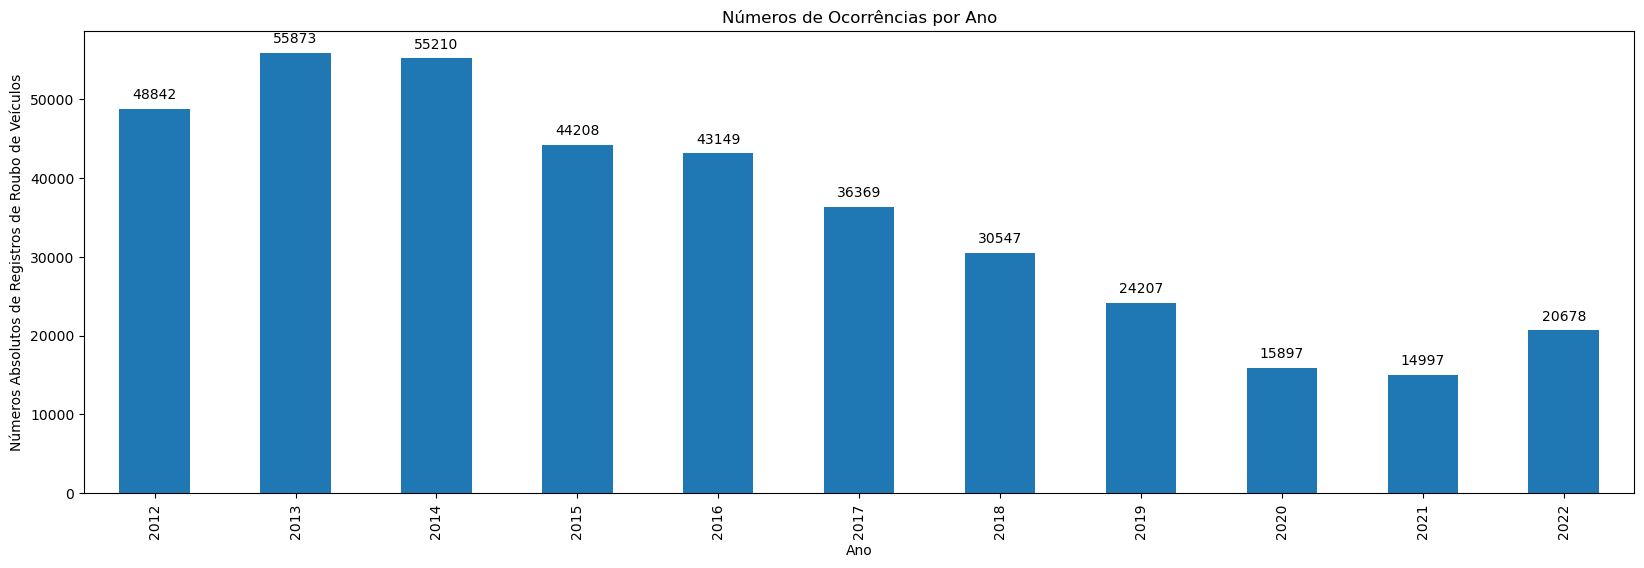

In [51]:
# Crie a figura com um tamanho específico
plt.figure(figsize=(20, 6))
# Plotar o gráfico de barras usando a série 'contagem_anos'
cont_ano = dataset['ANO_BO'].value_counts().sort_index().plot(kind='bar')
# Adiciona rótulos ao eixo x e y
plt.xlabel('Ano')
plt.ylabel('Números Absolutos de Registros de Roubo de Veículos')
# Adiciona um título ao gráfico
plt.title('Números de Ocorrências por Ano')

# Itera sobre cada barra (patch) no gráfico de barras
for linha in cont_ano.patches:
    # Adiciona uma anotação (número total) acima de cada barra
    cont_ano.annotate(
        f"{linha.get_height():.0f}",                                    # Texto formatado com a altura da barra como número inteiro
        (linha.get_x() + linha.get_width() / 2., linha.get_height()),   # Coordenadas do texto (centro da barra)
        ha='center',                                                    # Alinhamento horizontal: centralizado
        va='center',                                                    # Alinhamento vertical: centralizado
        xytext=(0, 10),                                                 # Deslocamento do texto (10 pontos acima)
        textcoords='offset points'                                      # Coordenadas do deslocamento em pontos
    )

# Exibe o gráfico
plt.show()

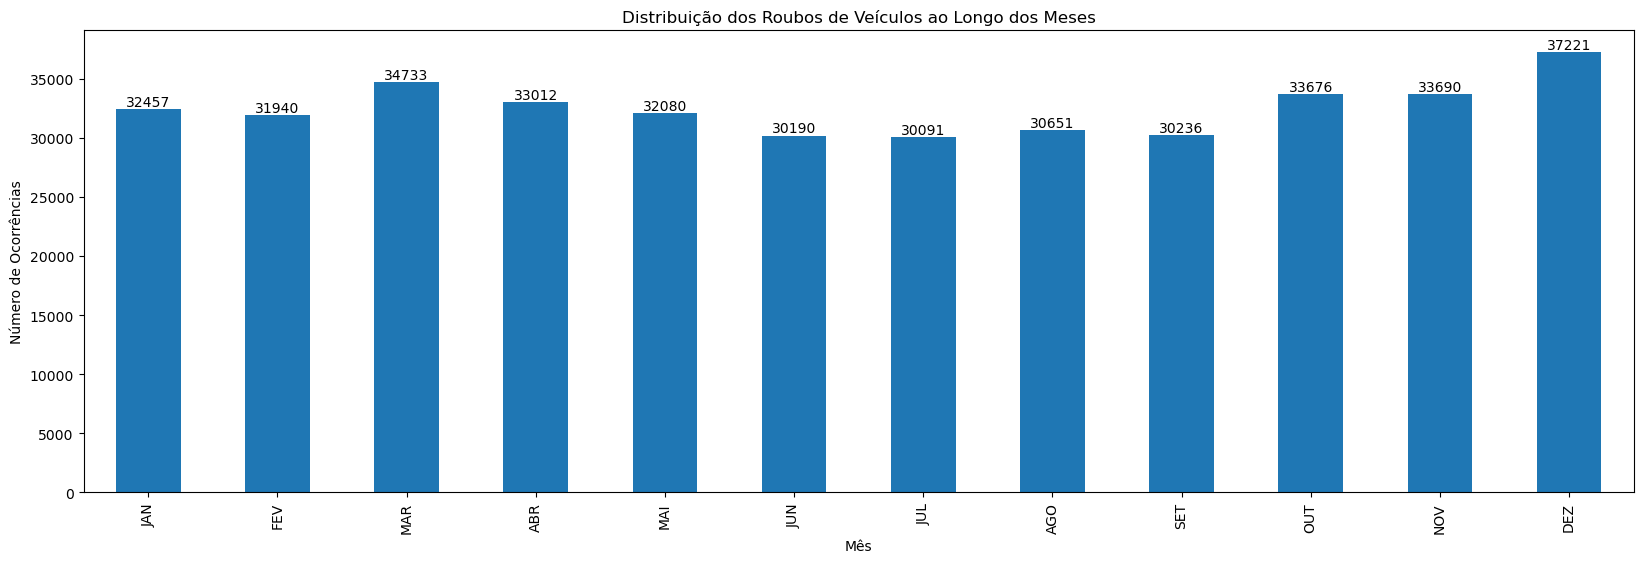

In [52]:
plt.figure(figsize=(20, 6))
 
mes.value_counts().sort_index().plot(kind='bar')

plt.title('Distribuição dos Roubos de Veículos ao Longo dos Meses')
plt.xlabel('Mês')
plt.ylabel('Número de Ocorrências')
plt.xticks(ticks=range(12), labels=['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL','AGO','SET','OUT','NOV','DEZ'])

# Adicionando anotações acima de cada barra com o número total de ocorrências
for i, value in enumerate(mes.value_counts().sort_index()):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()

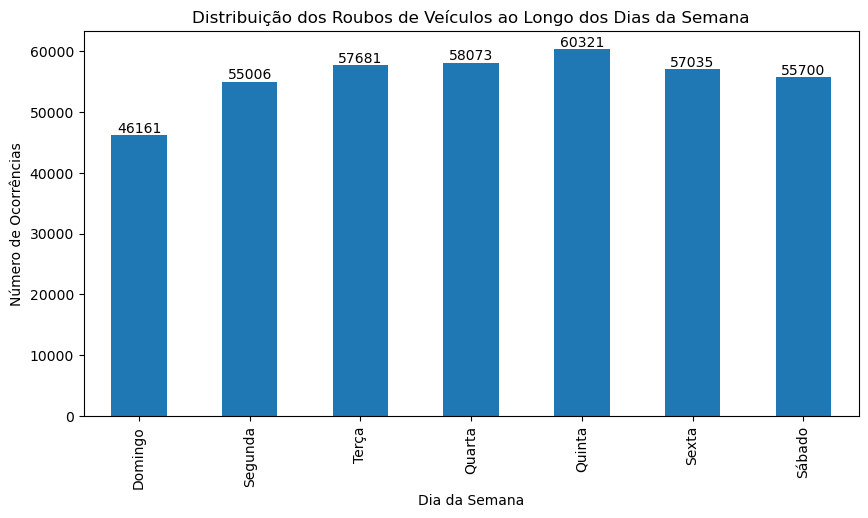

In [53]:
# Plotar a distribuição dos roubos de veículos ao longo dos dias da semana
plt.figure(figsize=(10, 5))
dia_semana.value_counts().sort_index().plot(kind='bar')
plt.title('Distribuição dos Roubos de Veículos ao Longo dos Dias da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Ocorrências')
plt.xticks(ticks=range(7), labels=['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado'])

# Adicionando anotações acima de cada barra com o número total de ocorrências
for i, value in enumerate(dia_semana.value_counts().sort_index()):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()

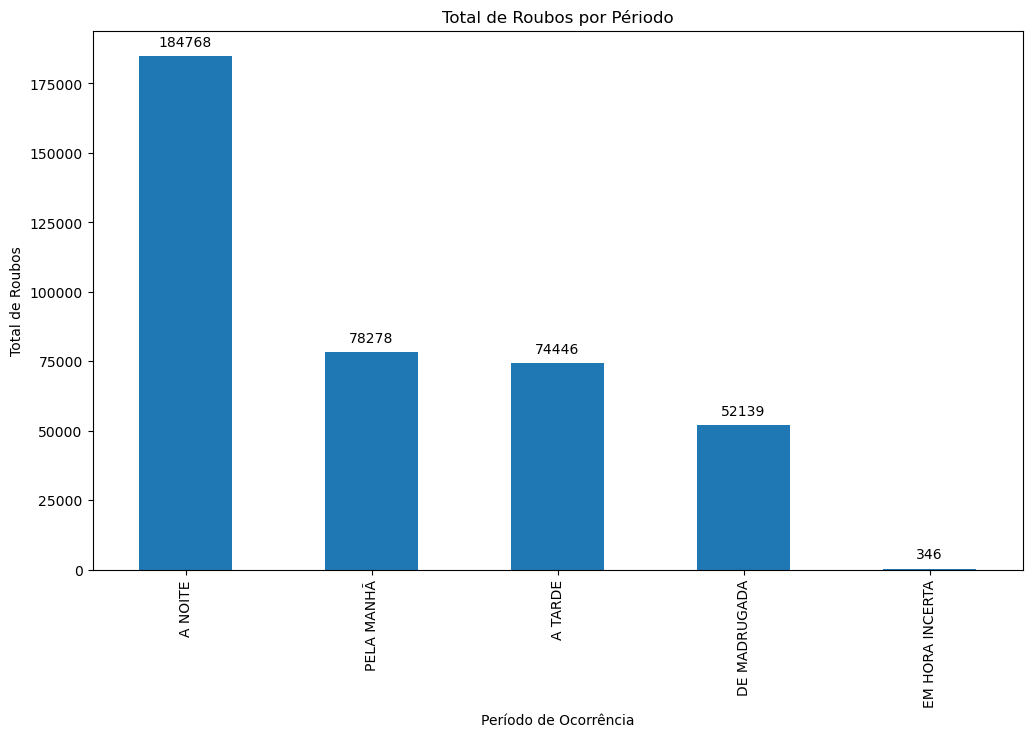

In [54]:
# Definindo o tamanho da figura
plt.figure(figsize=(12, 7))

# Plotando o gráfico de barras usando o método plot da série
grafico = dataset['PERIODOOCORRENCIA'].value_counts().plot(kind='bar')

# Adicionando título e rótulos aos eixos
plt.title('Total de Roubos por Périodo')
plt.xlabel('Período de Ocorrência')
plt.ylabel('Total de Roubos')

# Itera sobre cada barra (patch) no gráfico de barras
for p in grafico.patches:
    # Adiciona uma anotação (número total) acima de cada barra
    grafico.annotate(
        f"{p.get_height():.0f}",                            # Texto formatado com a altura da barra como número inteiro
        (p.get_x() + p.get_width() / 2., p.get_height()),   # Coordenadas do texto (centro da barra)
        ha='center',                                        # Alinhamento horizontal: centralizado
        va='center',                                        # Alinhamento vertical: centralizado
        xytext=(0, 10),                                     # Deslocamento do texto (10 pontos acima)
        textcoords='offset points'                          # Coordenadas do deslocamento em pontos
    )
# Exibindo o gráfico
plt.show()

## Análise Espacial:

* Agregação dos Dados por Bairro e Período
* Agregue os dados para contar o número de ocorrências por bairro e por período (mensal, trimestral, etc.).

In [55]:
# Calcula a contagem de ocorrências para cada valor único na coluna 'CIDADE'
dataset['BAIRRO'].value_counts().head(20)

BAIRRO
JABAQUARA            9848
ITAQUERA             8576
SAO MATEUS           7730
ITAIM PAULISTA       7514
IPIRANGA             6535
CIDADE ADEMAR        6446
SAPOPEMBA            6362
SACOMA               6308
PIRITUBA             6157
IGUATEMI             6147
SAO RAFAEL           6116
GUAIANASES           5384
PEDREIRA             4843
CAMPO LIMPO          4375
GRAJAU               4256
VILA PRUDENTE        4003
CAPAO REDONDO        3959
CIDADE TIRADENTES    3938
CAMPO GRANDE         3805
FREGUESIA DO O       3786
Name: count, dtype: int64

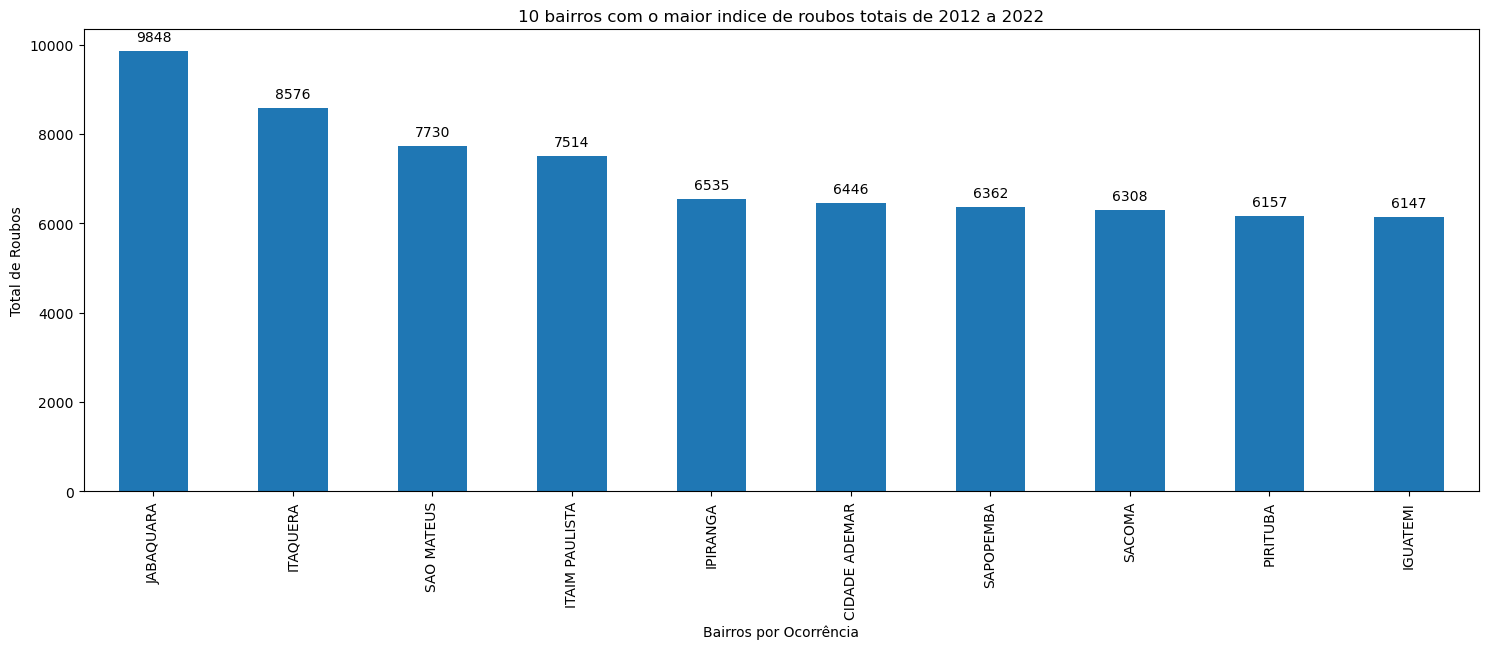

In [56]:
# Definindo o tamanho da figura
plt.figure(figsize=(18, 6))

# Plotando o gráfico de barras usando o método plot da série
grafico2 = dataset['BAIRRO'].value_counts().head(10).plot(kind='bar')

# Adicionando título e rótulos aos eixos
plt.title('10 bairros com o maior indice de roubos totais de 2012 a 2022')
plt.xlabel('Bairros por Ocorrência')
plt.ylabel('Total de Roubos')

# Itera sobre cada barra (patch) no gráfico de barras
for p in grafico2.patches:
    # Adiciona uma anotação (número total) acima de cada barra
    grafico2.annotate(
        f"{p.get_height():.0f}",                            # Texto formatado com a altura da barra como número inteiro
        (p.get_x() + p.get_width() / 2., p.get_height()),   # Coordenadas do texto (centro da barra)
        ha='center',                                        # Alinhamento horizontal: centralizado
        va='center',                                        # Alinhamento vertical: centralizado
        xytext=(0, 10),                                     # Deslocamento do texto (10 pontos acima)
        textcoords='offset points'                          # Coordenadas do deslocamento em pontos
    )

# Exibindo o gráfico
plt.show()

In [57]:
dataset.head()

,ANO_BO,DATAOCORRENCIA,BAIRRO,PERIODOOCORRENCIA,CIDADE
4,2012,2012-01-01,AMERICANOPOLIS,DE MADRUGADA,S.PAULO
5,2012,2012-01-01,PQ SAO RAFAEL,DE MADRUGADA,S.PAULO
8,2012,2012-01-01,JARDIM RODOLFO PIRANI,DE MADRUGADA,S.PAULO
9,2012,2012-01-01,JD. SAPOPEMBA,DE MADRUGADA,S.PAULO
10,2012,2012-01-01,EDU CHAVES,DE MADRUGADA,S.PAULO


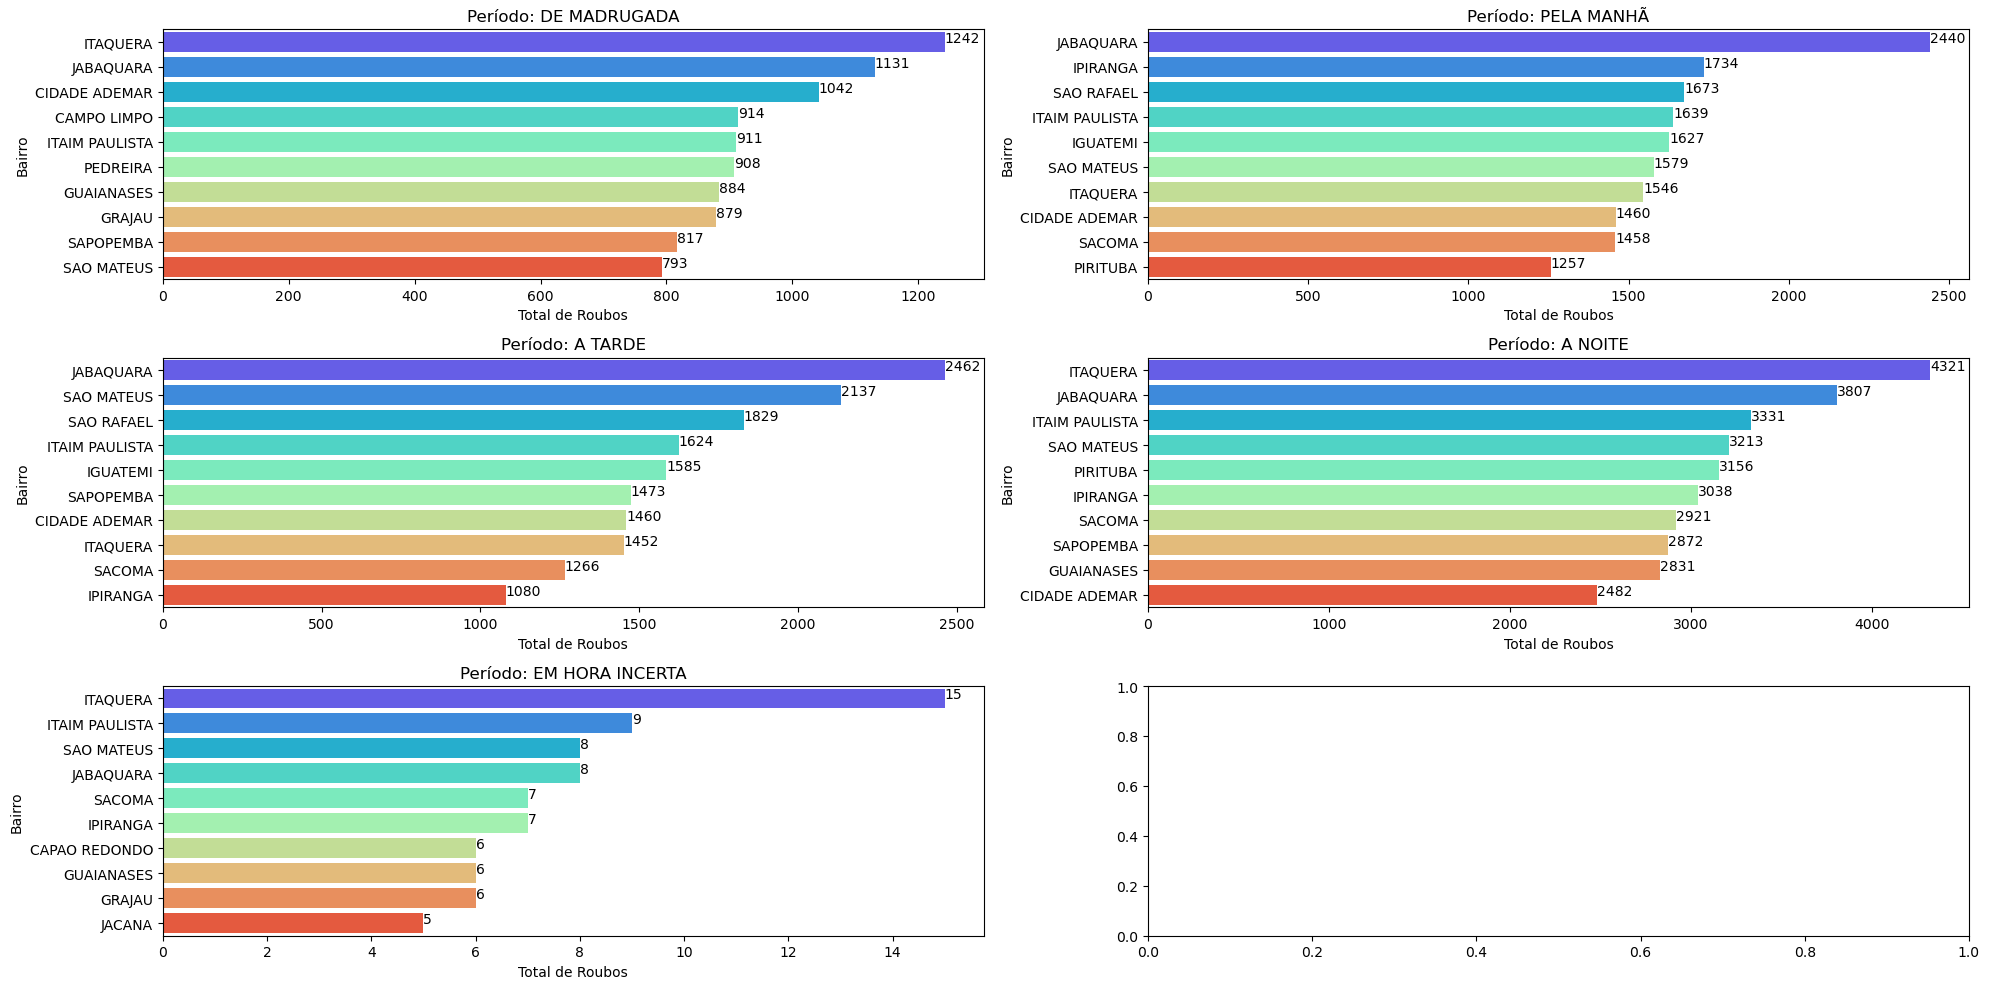

In [60]:
import math

# Definindo a quantidade de colunas
col = 2

# Obtendo os períodos únicos
periodos = dataset['PERIODOOCORRENCIA'].unique()

# Calculando o número de linhas dinamicamente
row = math.ceil(len(periodos) / col)

# Criando a figura e os eixos
fig, ax = plt.subplots(row, col, figsize=(20,10))

# Iterando sobre os períodos
for i, periodo in enumerate(periodos):
    # Obtendo os 10 principais bairros para o período atual
    top_bairros = dataset[dataset['PERIODOOCORRENCIA'] == periodo]['BAIRRO'].value_counts().head(10)
    
    # Plotando o gráfico de barras
    sns.barplot(x=top_bairros.values, y=top_bairros.index, palette='rainbow', ax=ax[i // col, i % col])
    
    ax[i // col, i % col].set_title(f'Período: {periodo}')
    ax[i // col, i % col].set_xlabel('Total de Roubos')
    ax[i // col, i % col].set_ylabel('Bairro')
    
    # Adicionando o número de casos em cada barra
    for index, value in enumerate(top_bairros.values):
        ax[i // col, i % col].text(value, index, str(value), color='black', ha='left')

# Ajustando o layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()


In [61]:
dataset.head()

,ANO_BO,DATAOCORRENCIA,BAIRRO,PERIODOOCORRENCIA,CIDADE
4,2012,2012-01-01,AMERICANOPOLIS,DE MADRUGADA,S.PAULO
5,2012,2012-01-01,PQ SAO RAFAEL,DE MADRUGADA,S.PAULO
8,2012,2012-01-01,JARDIM RODOLFO PIRANI,DE MADRUGADA,S.PAULO
9,2012,2012-01-01,JD. SAPOPEMBA,DE MADRUGADA,S.PAULO
10,2012,2012-01-01,EDU CHAVES,DE MADRUGADA,S.PAULO


In [62]:
# Tentando converter e identificando os valores que não podem ser convertidos
invalid_dates = dataset[pd.to_datetime(dataset['DATAOCORRENCIA'], errors='coerce').isna()]
print(invalid_dates)

Empty DataFrame
Columns: [ANO_BO, DATAOCORRENCIA, BAIRRO, PERIODOOCORRENCIA, CIDADE]
Index: []


In [63]:
# Tentando converter com erro coerce
dataset['DATAOCORRENCIA'] = pd.to_datetime(dataset['DATAOCORRENCIA'], errors='coerce')

In [64]:
# Criando a coluna MES a partir de DATAOCORRENCIA (convertendo para período mensal)
dataset['MES'] = dataset['DATAOCORRENCIA'].dt.to_period('M')

# Agrupando os dados por BAIRRO e MES, e contando o número de ocorrências
bairro_agg = dataset.groupby(['BAIRRO', 'MES']).size().reset_index(name='TOTAL_OCORRENCIAS')

Text(0.5, 1.0, 'Tendências de Ocorrências em ITAQUERA')

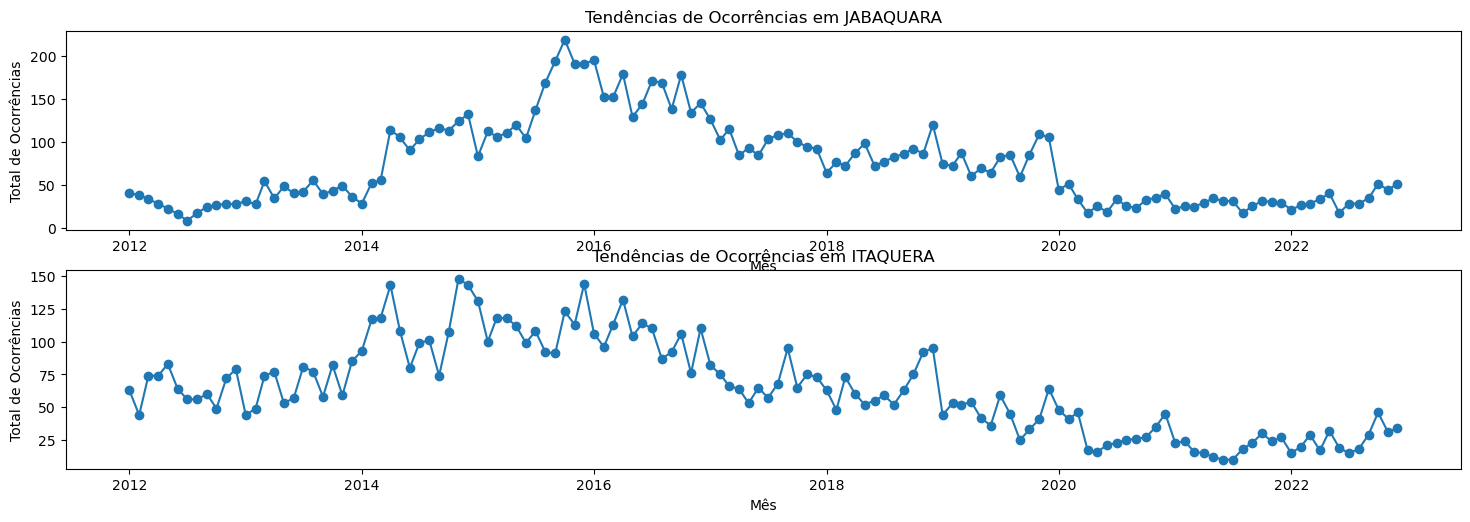

In [65]:
# Definindo o tamanho da figura
plt.figure(figsize=(18, 15))

# JABAQUARA
bairro_jabaquara = bairro_agg[bairro_agg['BAIRRO'] == 'JABAQUARA']
plt.subplot(511)  # subplot com 3 linhas, 2 colunas, posição 1
plt.plot(bairro_jabaquara['MES'].dt.to_timestamp(), bairro_jabaquara['TOTAL_OCORRENCIAS'], marker='o')
plt.xlabel('Mês')
plt.ylabel('Total de Ocorrências')
plt.title('Tendências de Ocorrências em JABAQUARA')

# ITAQUERA
bairro_itaquera = bairro_agg[bairro_agg['BAIRRO'] == 'ITAQUERA']
plt.subplot(512)  # subplot com 3 linhas, 2 colunas, posição 2
plt.plot(bairro_itaquera['MES'].dt.to_timestamp(), bairro_itaquera['TOTAL_OCORRENCIAS'], marker='o')
plt.xlabel('Mês')
plt.ylabel('Total de Ocorrências')
plt.title('Tendências de Ocorrências em ITAQUERA')

In [66]:
bairro_jabaquara.head(60)

,BAIRRO,MES,TOTAL_OCORRENCIAS
13473,JABAQUARA,2012-01,40
13474,JABAQUARA,2012-02,38
13475,JABAQUARA,2012-03,33
13476,JABAQUARA,2012-04,28
13477,JABAQUARA,2012-05,22
13478,JABAQUARA,2012-06,16
13479,JABAQUARA,2012-07,8
13480,JABAQUARA,2012-08,17
13481,JABAQUARA,2012-09,24
13482,JABAQUARA,2012-10,26


## Criando novo dataset para analise de series temporais

In [ ]:
dataset.head()

In [ ]:
#dataset['DIA'] = dataset['DATAOCORRENCIA'].dt.to_period('D')
#dataset['SEMANA'] = dataset['DATAOCORRENCIA'].dt.to_period('W')
dataset['MES'] = dataset['DATAOCORRENCIA'].dt.to_period('M')

In [ ]:
dataset

In [ ]:
cidade_agg = dataset.groupby(['MES']).size().reset_index(name='TOTAL_OCORRENCIAS')
cidade_agg

# Estacionaridade

## Teste Dickey-Fuller Aumentado (ADF)

In [ ]:
# 1. Define uma série temporal específica a partir de 'cidade_agg'.
# O método 'set_index' define 'MES' como o índice do DataFrame.
# A coluna 'TOTAL_OCORRENCIAS' é selecionada para criar a série temporal 'cidade_especifico_ts'.
# Define uma série temporal específica a partir de 'cidade_agg'.
cidade_especifico_ts = cidade_agg.set_index('MES')['TOTAL_OCORRENCIAS'] 

In [ ]:
# Teste Dickey-Fuller Aumentado
adf_result = adfuller(cidade_especifico_ts)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print()
# Define o nível de significância
nivel_significancia = 0.05

# Verifica se o valor p é menor ou igual ao nível de significância
if adf_result[1] <= nivel_significancia:
    # Se for, imprime que há evidências suficientes para rejeitar a hipótese nula
    print("Há evidências suficientes para rejeitar a hipótese nula.\nExiste uma diferença significativa entre as médias.")
else:
    # Caso contrário, imprime que não há evidências suficientes para rejeitar a hipótese nula
    print("Não há evidências suficientes para rejeitar a hipótese nula.\nNão existe uma diferença significativa entre as médias.")

## Transformação Logarítmica

In [ ]:
cidade_agg['LOG_TOTAL_OCORRENCIAS'] = np.log(cidade_agg['TOTAL_OCORRENCIAS'])

# 1. Define uma série temporal específica a partir de 'cidade_agg'.
# O método 'set_index' define 'MES' como o índice do DataFrame.
# A coluna 'TOTAL_OCORRENCIAS' é selecionada para criar a série temporal 'cidade_especifico_ts'.
cidade_especifico_ts = cidade_agg.set_index('MES')['LOG_TOTAL_OCORRENCIAS']

# 2. Converte o índice da série temporal para o formato de carimbo de data/hora (timestamp).
# Isso é útil se o índice 'MES' estiver em um formato que não seja datetime, como strings ou inteiros.
# A conversão garante que as operações de série temporal, como reamostragem ou diferenciação, funcionem corretamente.
#cidade_especifico_ts.index = cidade_especifico_ts.index.to_timestamp()

In [ ]:
# Teste Dickey-Fuller Aumentado
adf_result = adfuller(cidade_especifico_ts)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print()
# Define o nível de significância
nivel_significancia = 0.05

# Verifica se o valor p é menor ou igual ao nível de significância
if adf_result[1] <= nivel_significancia:
    # Se for, imprime que há evidências suficientes para rejeitar a hipótese nula
    print("Há evidências suficientes para rejeitar a hipótese nula.\nExiste uma diferença significativa entre as médias.")
else:
    # Caso contrário, imprime que não há evidências suficientes para rejeitar a hipótese nula
    print("Não há evidências suficientes para rejeitar a hipótese nula.\nNão existe uma diferença significativa entre as médias.")

## Diferenciação de Primeira Ordem

In [ ]:
# Supondo que 'cidade_agg' é o seu DataFrame contendo a série temporal
# Realize a diferenciação de primeira ordem
cidade_agg['DIFF_TOTAL_OCORRENCIAS'] = cidade_agg['LOG_TOTAL_OCORRENCIAS'].diff()

# Remova os valores NaN resultantes da diferenciação
cidade_agg.dropna(inplace=True)

In [ ]:
# Verifique a estacionariedade dos resíduos da diferenciação usando o teste ADF
result = adfuller(cidade_agg['DIFF_TOTAL_OCORRENCIAS'])

print('Estatística ADF:', result[0])
print('Valor-p:', result[1])
print('Valores críticos:', result[4])
print()
# Define o nível de significância
nivel_significancia = 0.05
# Verifica se o valor p é menor ou igual ao nível de significância
if result[1] <= nivel_significancia:
    # Se for, imprime que há evidências suficientes para rejeitar a hipótese nula
    print("Há evidências suficientes para rejeitar a hipótese nula.\nExiste uma diferença significativa entre as médias.")
else:
    # Caso contrário, imprime que não há evidências suficientes para rejeitar a hipótese nula
    print("Não há evidências suficientes para rejeitar a hipótese nula.\nNão existe uma diferença significativa entre as médias.")

## Diferenciação de Segunda Ordem

In [ ]:
cidade_agg['DIFF_TOTAL_OCORRENCIAS_2'] = cidade_agg['DIFF_TOTAL_OCORRENCIAS'].diff()
# Remova os valores NaN resultantes da diferenciação
cidade_agg.dropna(inplace=True)

In [ ]:
# Verifique a estacionariedade dos resíduos da diferenciação usando o teste ADF
result = adfuller(cidade_agg['DIFF_TOTAL_OCORRENCIAS_2'])

print('Estatística ADF:', result[0])
print('Valor-p:', result[1])
print('Valores críticos:', result[4])
print()
# Verifica se o valor p é menor ou igual ao nível de significância
if result[1] <= nivel_significancia:
    # Se for, imprime que há evidências suficientes para rejeitar a hipótese nula
    print("Há evidências suficientes para rejeitar a hipótese nula.\nExiste uma diferença significativa entre as médias.")
else:
    # Caso contrário, imprime que não há evidências suficientes para rejeitar a hipótese nula
    print("Não há evidências suficientes para rejeitar a hipótese nula.\nNão existe uma diferença significativa entre as médias.")

# Modelagem e Previsão

Modelos ARIMA e SARIMA

Se a série for estacionária, use ARIMA. Caso haja sazonalidade, utilize SARIMA.

In [ ]:
# Selecionando colunas específicas
cidade_especifico_ts = cidade_agg[['MES', 'DIFF_TOTAL_OCORRENCIAS_2']]
# Selecionando apenas a série temporal para os modelos
serie_temporal = cidade_especifico_ts.set_index('MES')['DIFF_TOTAL_OCORRENCIAS_2']
serie_temporal.index = serie_temporal.index.to_timestamp()

In [ ]:
# Supondo que 'serie_temporal' seja um DataFrame do Pandas com o índice como datas
# Se o índice não for do tipo datetime, converta-o
if not isinstance(serie_temporal.index, pd.DatetimeIndex):
    serie_temporal.index = pd.to_datetime(serie_temporal.index)
    
# Supondo que 'serie_temporal' seja um DataFrame do Pandas com o índice como datas
# Dividindo a série temporal em treinamento e teste (70% treinamento, 30% teste)
tamanho_treino = int(len(serie_temporal) * 0.70)
serie_treino = serie_temporal[:tamanho_treino]
serie_teste = serie_temporal[tamanho_treino:]

In [ ]:
len(serie_treino), len(serie_teste)

## ARIMA

In [ ]:
# Ajuste e previsão usando o modelo ARIMA no conjunto de treinamento
model_arima = ARIMA(serie_treino, order=(2, 1, 2))
model_arima_fit = model_arima.fit()
# Faz a previsão para o conjunto de teste
forecast_arima = model_arima_fit.forecast(steps=len(serie_teste))

## SARIMA

In [ ]:
# Ajuste e previsão usando o modelo SARIMA no conjunto de treinamento
model_sarima = SARIMAX(serie_treino, order=(5, 2, 3), seasonal_order=(2, 1, 1, 12))
model_sarima_fit = model_sarima.fit()
# Faz a previsão para o conjunto de teste
forecast_sarima = model_sarima_fit.forecast(steps=len(serie_teste))

In [ ]:
# Calcula o erro quadrático médio (MSE) para ARIMA
mse_arima = mean_squared_error(serie_teste, forecast_arima)
# Calcula o erro quadrático médio (MSE) para SARIMA
mse_sarima = mean_squared_error(serie_teste, forecast_sarima)

# Supomos que você tenha dados reais para comparação
y_true = serie_temporal[-12:]  # valores reais dos últimos 12 meses
y_pred_arima = forecast_arima[:12]   # previsões ARIMA
y_pred_sarima = forecast_sarima[:12] # previsões SARIMA

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true))

# Calcular o MAPE para o modelo ARIMA
mape_arima = mean_absolute_percentage_error(serie_teste, forecast_arima)
print(f'MAPE do modelo ARIMA: {mape_arima:.2f}')

# Calcular o MAPE para o modelo SARIMA
mape_sarima = mean_absolute_percentage_error(serie_teste, forecast_sarima)
print(f'MAPE do modelo SARIMA: {mape_sarima:.2f}')
mae_arima = mean_absolute_error(y_true, y_pred_arima)
mae_sarima = mean_absolute_error(y_true, y_pred_sarima)

# Calcule o RMSE para o modelo ARIMA
rmse_arima = np.sqrt(mean_squared_error(serie_teste, forecast_arima))
# Calcule o RMSE para o modelo SARIMA
rmse_sarima = np.sqrt(mean_squared_error(serie_teste, forecast_sarima))

r2_arima = r2_score(serie_teste, forecast_arima)
r2_sarima = r2_score(serie_teste, forecast_sarima)

# Exiba os resultados
print(f'MSE do modelo ARIMA: {mse_arima}')
print(f'MSE do modelo SARIMA: {mse_sarima}')
print(f'MAE ARIMA: {mae_arima}')
print(f'MAE SARIMA: {mae_sarima}')
print(f"RMSE do modelo ARIMA: {rmse_arima}")
print(f"RMSE do modelo SARIMA: {rmse_sarima}")
print(f"Coeficiente de Determinação arima (R²): {r2_arima}")
print(f"Coeficiente de Determinação sarima (R²): {r2_sarima}")